In [1]:
#using Pkg
# create a separate environment for the notebook
#Pkg.activate(".")
#Pkg.status()

In [2]:
# add QInchworm to notebook environment
#Pkg.develop(path="../../")

In [3]:
using Printf

In [4]:
# assume these are in base env
using PyPlot, Revise

In [5]:
using QInchworm
import QInchworm.diagrammatics

In [6]:
function make_arc(x1, x2; kwargs...)
    width = x2 - x1
    height = width
    arc = matplotlib.patches.Arc((x2 - width/2, 0.0), width, height, theta2=180.0; kwargs...)
    return arc
end

function plot_topology!(ax, vertices, t::diagrammatics.Topology, k::Int = 0)
    connected, disconnected = diagrammatics.split_k_connected(t.pairs, k)
    diagrammatics.traverse_crossing_graph_dfs!(connected, disconnected)

    for p in connected
      arc = make_arc(vertices[p.first], vertices[p.second]; edgecolor="black")
      ax.add_patch(arc)
    end

    for p in disconnected
      arc = make_arc(vertices[p.first], vertices[p.second]; edgecolor="red")
      ax.add_patch(arc)
    end
end


plot_topology! (generic function with 2 methods)

In [7]:
function plot_all_topologies(order::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = (vertices[1] + vertices[2]) / 2 # k = 1
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    ntopos = length(topos)
    
    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]

        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")
    end
end

plot_all_topologies (generic function with 1 method)

In [32]:
function plot_k_connected_topologies(order::Int, k::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = k < 2*order ? ((vertices[k] + vertices[k+1]) / 2) : vertices[k]
    
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    
    filter!(topos) do top
        diagrammatics.is_k_connected(top, k)
    end
    
    
    ntopos = length(topos)

    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]

        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")
    end    
end

plot_k_connected_topologies (generic function with 1 method)

In [42]:
function plot_doubly_k_connected_topologies(order::Int, k::Int)
    vertices = range(0.0, 1.0, 2*order)
    t_inch = k < 2*order ? ((vertices[k] + vertices[k+1]) / 2) : vertices[k]
    
    
    topos = diagrammatics.Topology.(diagrammatics.pair_partitions(order))
    
    filter!(topos) do top
        diagrammatics.is_doubly_k_connected(top, k)
    end
    
    
    ntopos = length(topos)

    nrows = Int(ceil(ntopos // 5))
    fig = plt.figure(figsize=(10, 1*nrows))
    gs = matplotlib.gridspec.GridSpec(nrows, 5, figure=fig, wspace=0, hspace=0)

    for (k, (i,j)) in zip(1:ntopos, Iterators.product(1:nrows, 1:5))
        ax = fig.add_subplot(gs[i,j])
        ax.plot(vertices, zero(vertices), "k.")

        top = topos[k]

        plot_topology!(ax, vertices, top, 1)
        ax.set_ylim([0.0, 0.55])
        ax.set(xticks=[], yticks=[])
        ax.axvline([t_inch], color="k", linestyle="--")
    end    
end

plot_doubly_k_connected_topologies (generic function with 1 method)

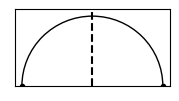

In [33]:
plot_all_topologies(1)

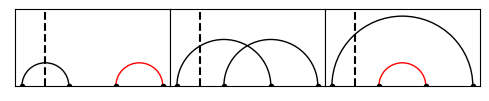

In [10]:
plot_all_topologies(2)

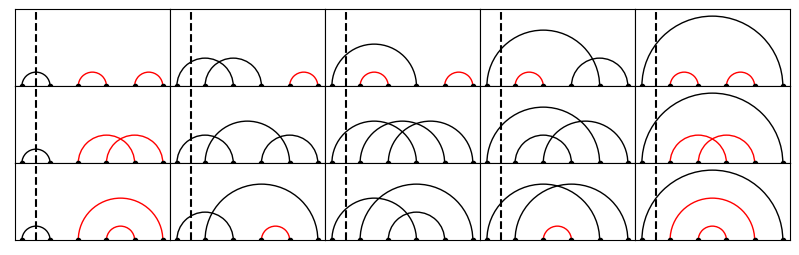

In [11]:
plot_all_topologies(3)

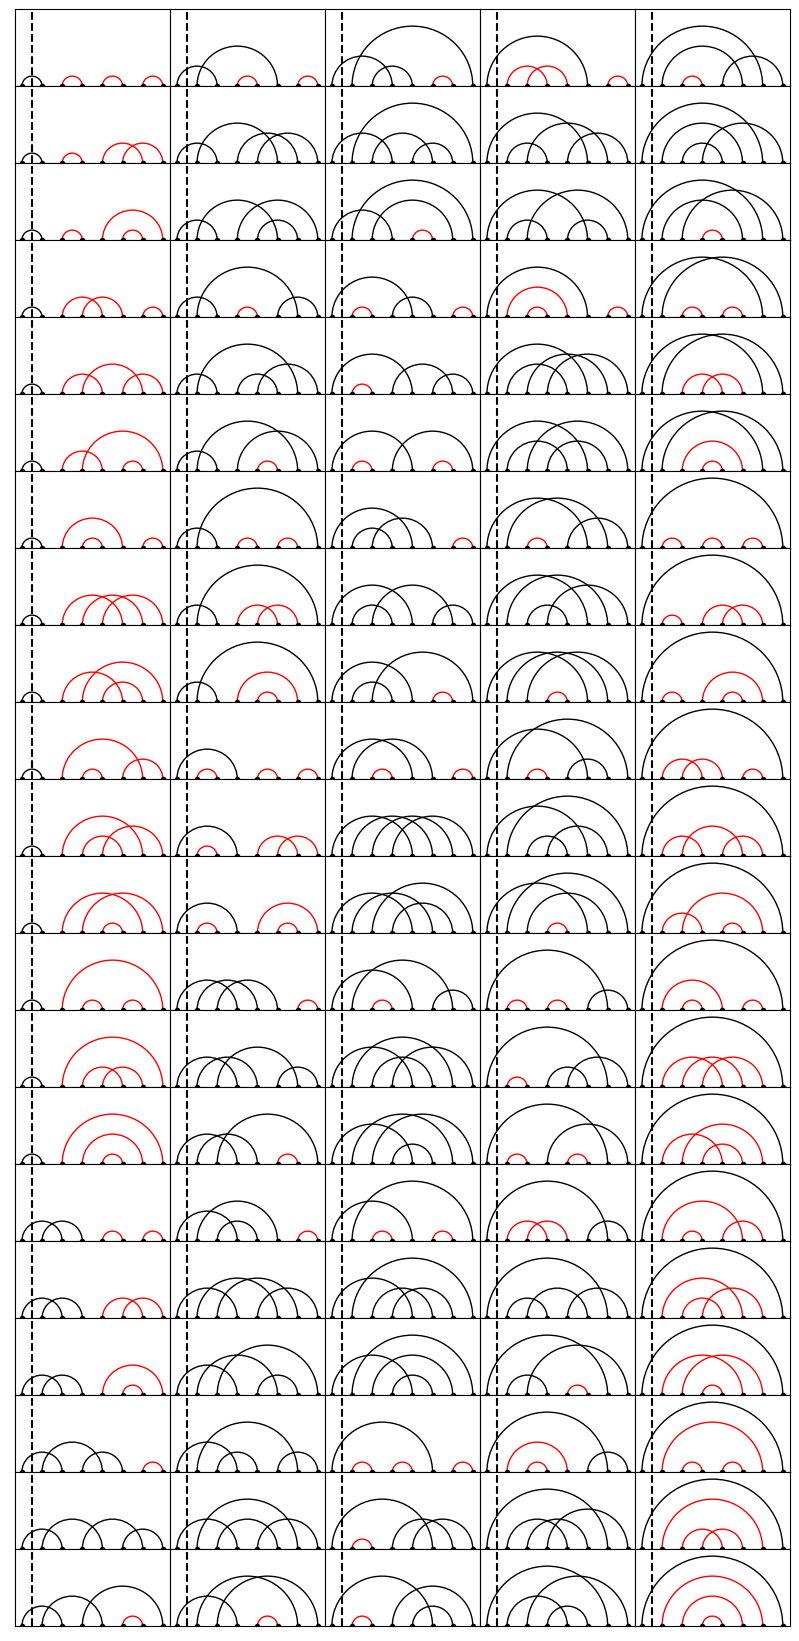

In [12]:
plot_all_topologies(4)

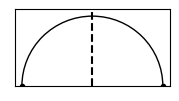

In [34]:
plot_k_connected_topologies(1, 1)

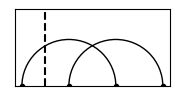

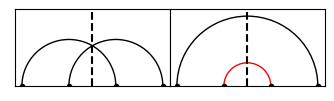

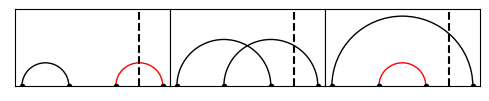

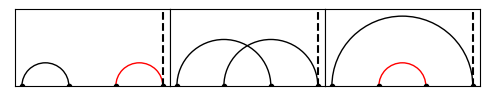

In [40]:
plot_k_connected_topologies(2, 1)
plot_k_connected_topologies(2, 2)
plot_k_connected_topologies(2, 3)
plot_k_connected_topologies(2, 4)

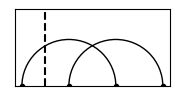

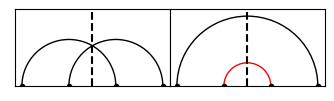

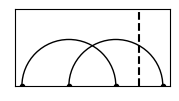

In [44]:
plot_doubly_k_connected_topologies(2, 1)
plot_doubly_k_connected_topologies(2, 2)
plot_doubly_k_connected_topologies(2, 3)

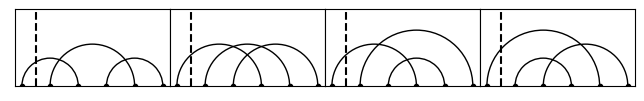

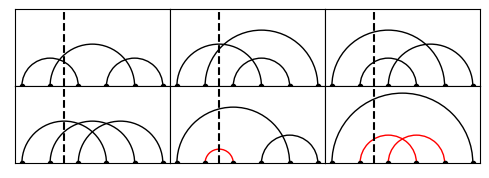

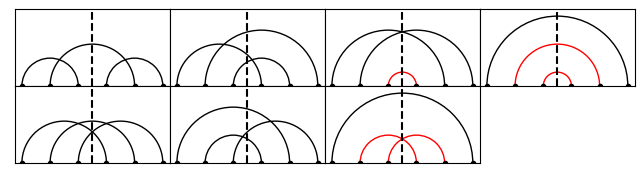

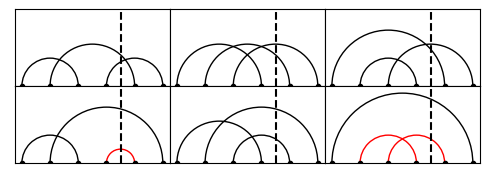

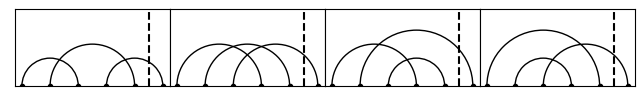

In [45]:
plot_doubly_k_connected_topologies(3, 1)
plot_doubly_k_connected_topologies(3, 2)
plot_doubly_k_connected_topologies(3, 3)
plot_doubly_k_connected_topologies(3, 4)
plot_doubly_k_connected_topologies(3, 5)

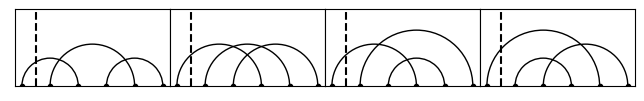

In [27]:
plot_k_connected_topologies(3, 1)

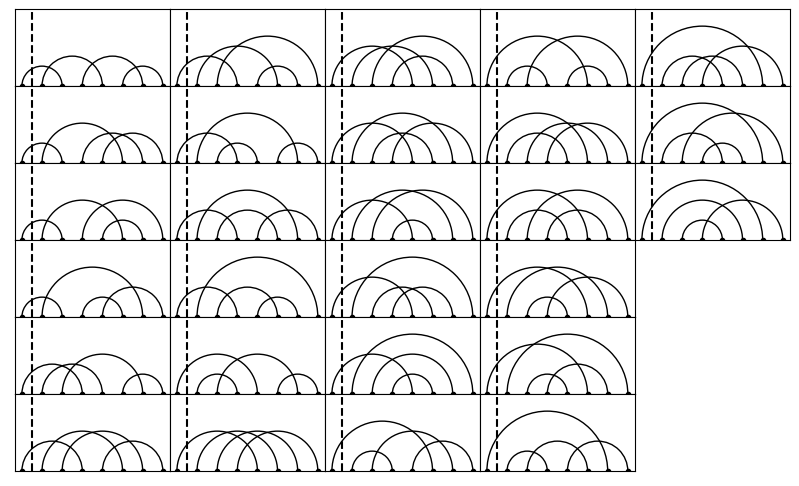

In [16]:
plot_k_connected_topologies(4, 1)

In [17]:
orders = 1:8
ntopos_by_order = map(orders) do order
    ntopos = length(filter!(top -> diagrammatics.is_k_connected(top, 1), diagrammatics.Topology.(diagrammatics.pair_partitions(order))))
    return ntopos
end

8-element Vector{Int64}:
      1
      1
      4
     27
    248
   2830
  38232
 593859

In [18]:
@printf("%-8s %15s %15s\n", "order", "1-connected", "all")
for (n, m, o) in zip(ntopos_by_order, map(o -> diagrammatics.double_factorial(2o - 1), orders), orders)
    @printf("%-8d %15d %15d\n", o, n, m)
     # println("order $o: ")
end

order        1-connected             all
1                      1               1
2                      1               3
3                      4              15
4                     27             105
5                    248             945
6                   2830           10395
7                  38232          135135
8                 593859         2027025


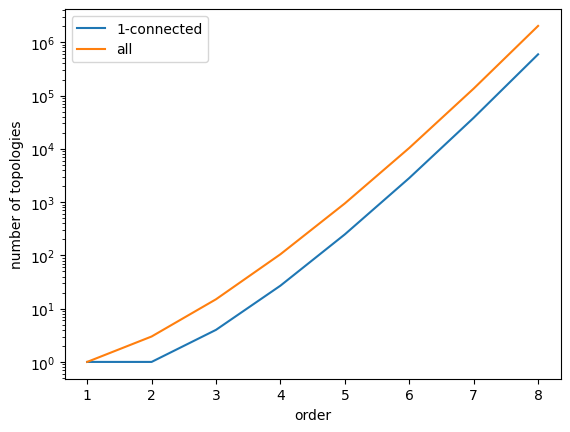

PyObject <matplotlib.legend.Legend object at 0x7fdb0f9de710>

In [19]:
fig, ax = plt.subplots()
ax.plot(orders, ntopos_by_order, label="1-connected")
ax.plot(orders, map(o -> diagrammatics.double_factorial(2o - 1), orders), label="all")
ax.set_xlabel("order")
ax.set_ylabel("number of topologies")
ax.set_yscale("log")
ax.legend()